<a href="https://www.kaggle.com/code/raghavgarg12/house-price-regression-baseline?scriptVersionId=133605472" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

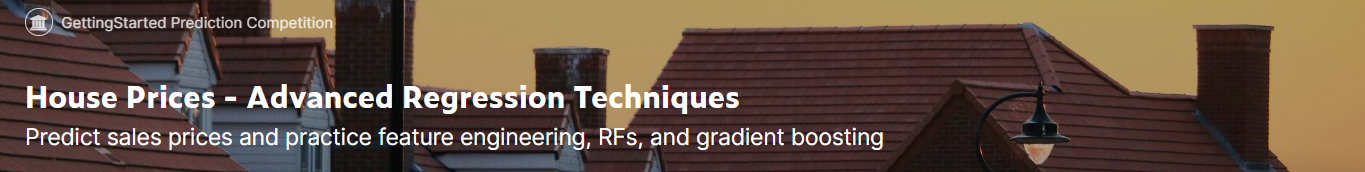

The House Price Regression competition on Kaggle challenges participants to develop accurate predictive models for estimating the sale prices of residential homes. It involves analyzing housing data, including features like bedrooms, location, and square footage, to predict prices. Participants follow the data science workflow, including data exploration, feature engineering, model selection, and hyperparameter tuning. The competition offers an opportunity to enhance regression modeling skills and learn from other participants' approaches.

## 1.1 Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2 Read Data

In [2]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
print(train.shape)
train.describe()
train=train[0:5000]

(1460, 81)


### 1.3

In [3]:
def compare_columns(df1, df2):
    df1_columns_set = set(df1.columns)
    df2_columns_set = set(df2.columns)
    print('df1_columns_set - df2_columns_set :', df1_columns_set - df2_columns_set)
    print('df2_columns_set - df1_columns_set :', df2_columns_set - df1_columns_set)

# 2.0 EDA and Preprocessing

In [4]:
train["LogSalePrice"] = train['SalePrice'].apply(np.log)

### 2.1

In [5]:
# determine the threshold for missing values
def calc_percent_missing(df):
    nan_percent = {col : df[col].isnull().mean() for col in df.columns}
    return nan_percent

### 2.2

In [6]:
nan_percent = calc_percent_missing(train)
nan_percent = pd.DataFrame(sorted(nan_percent.items(), key=lambda x: x[1], reverse=True))
nan_percent = nan_percent[nan_percent[1] >= 0.005]

### 2.3

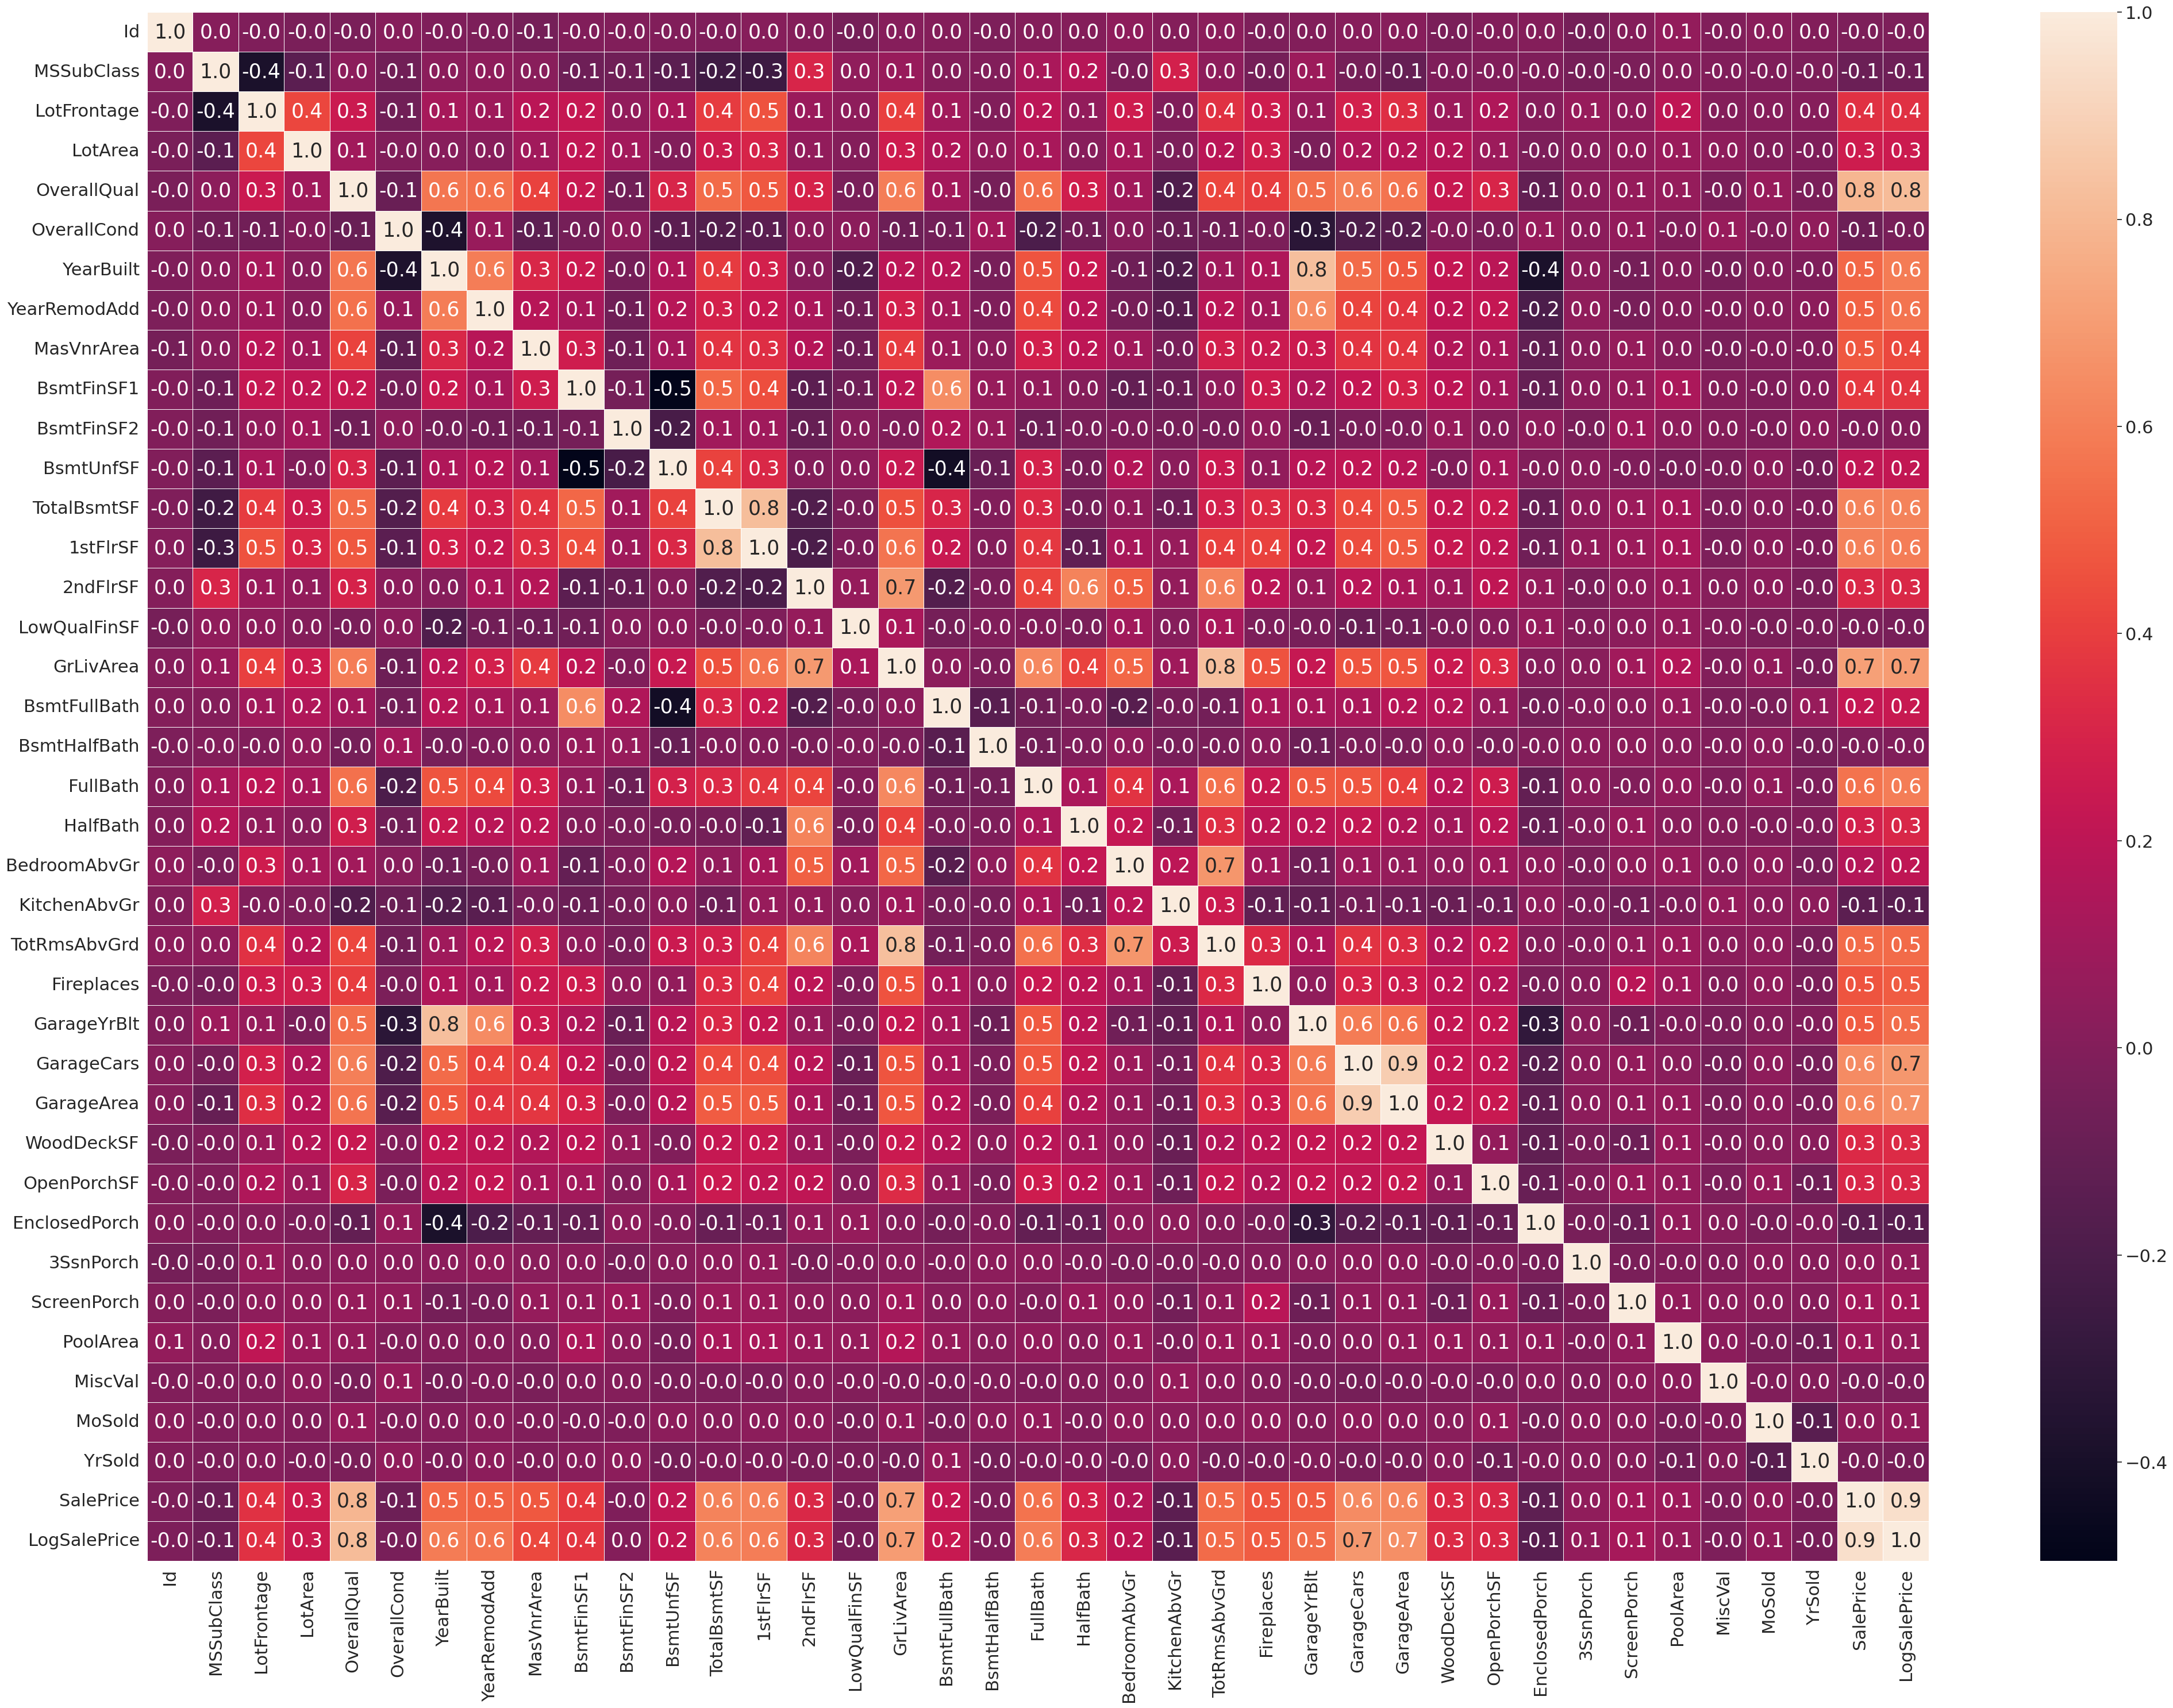

In [7]:
correlation_train=train[train.dtypes[train.dtypes != 'object'].index].corr()
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sns.heatmap(correlation_train, annot=True,annot_kws={"size": 25},fmt='.1f', linewidths=.5)

### 2.4

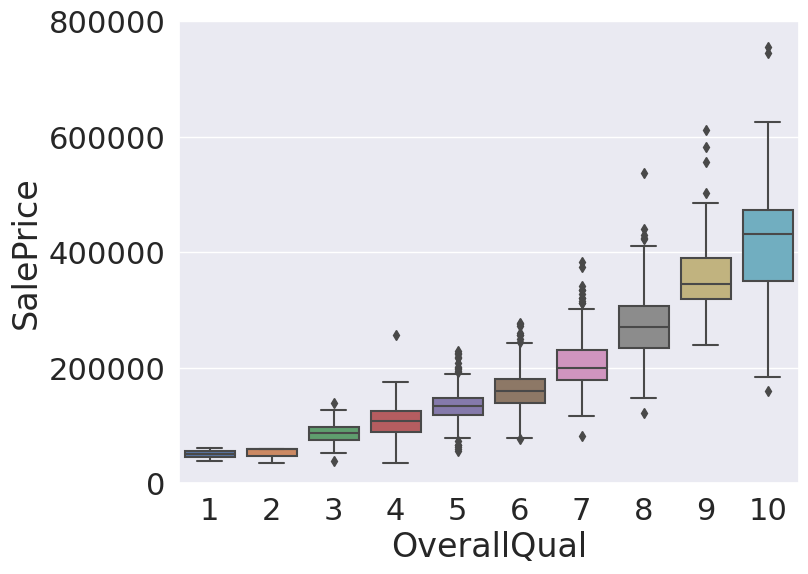

In [8]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### 2.5

In [9]:
num_cols = [col for col in train.columns if train[col].dtype in ["float16","float32","float64", "int64", "int32"]]
cat_cols = [col for col in train.columns if train[col].dtype not in ["float16","float32","float64", "int64", "int32"]]

### 2.6

In [10]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageQual,81,0.055479


### 2.7

In [11]:
df_train = train.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
df_test = test.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

### 2.8

In [12]:
# Checking the features with NaN remained out
def replace_nan_values(df):
    for col in df:
        df[col] = df[col].fillna(df[col].mode()[0])

### 2.9

In [13]:
replace_nan_values(df_train)

### 2.10

In [14]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Id,0,0.0
GarageCars,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0


### 2.11

In [15]:
compare_columns(df_train,df_test)

df1_columns_set - df2_columns_set : {'LogSalePrice', 'SalePrice'}
df2_columns_set - df1_columns_set : set()


### 2.12

In [16]:
data = df_train.drop(columns=['SalePrice', 'LogSalePrice'])

### 2.13

In [17]:
compare_columns(data,df_test)

df1_columns_set - df2_columns_set : set()
df2_columns_set - df1_columns_set : set()


### 2.14

In [18]:
data_train_test = pd.concat([data, df_test])

### 2.15

In [19]:
data_train_test["SqFtPerRoom"] = data_train_test["GrLivArea"] / (data_train_test["TotRmsAbvGrd"] + data_train_test["FullBath"] + data_train_test["HalfBath"] + data_train_test["KitchenAbvGr"])
data_train_test['Total_Home_Quality'] = data_train_test['OverallQual'] + data_train_test['OverallCond']
data_train_test['Total_Bathrooms'] = data_train_test['FullBath'] + 0.5 * data_train_test['HalfBath'] + data_train_test['BsmtFullBath'] + 0.5 * data_train_test['BsmtHalfBath']
data_train_test["HighQualSF"] = data_train_test["1stFlrSF"] + data_train_test["2ndFlrSF"]

### 2.16

In [20]:
# Creating dummy variables from categorical features
data_train_test = pd.get_dummies(data_train_test)

### 2.17

In [21]:
data, df_test = data_train_test[:len(data)], data_train_test[len(data):]

### 2.18

In [22]:
target = df_train['LogSalePrice']
test_id = df_test['Id']

# 3.0 Modeling

### 3.1

In [23]:
from sklearn.model_selection import RepeatedKFold, KFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV

# 5 Fold Cross validation
kf = KFold(n_splits=5, shuffle=True)
cv_scores, cv_std = [], []

### 3.2

In [24]:
# Creation of the RMSE metric:    
def rmse(model):
    return np.sqrt(-cross_val_score(model, data, target, scoring="neg_mean_squared_error", cv=kf))

### 3.3

In [25]:
def apply_learning_algorithm(model):
    score = rmse(model)
    cv_scores.append(score.mean())
    cv_std.append(score.std())

### 3.4

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error


### 3.5

In [27]:
model = LinearRegression()

### 3.6

In [28]:
# Train-Test split the data
x_train, x_validation, y_train, y_validation = train_test_split(data, target, test_size = 0.1)

### 3.7

In [29]:
model.fit(x_train,y_train)

LinearRegression()

### 3.8

In [30]:
preds = model.predict(x_validation)

### 3.9

In [31]:
mean_squared_error(y_validation,preds)

0.01491429643560673

# 4.0 Submission

In [32]:
test_pred = model.predict(df_test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()
submission.to_csv("submission.csv", index = False, header = True)